# IMDB Text Sentiment Classification
https://ai.stanford.edu/~amaas/data/sentiment/

- The data was collected by Stanford researchers 
- The data was used in a 2011 paper where a split of 50-50 of the data was used for training and test. 
- An accuracy of 88.89% was achieved.

## About Model
- Tanh 대신 ReLU 사용하기 : train, validation accuracy가 오르지 않음 (자연어 처리는 이미지 처리와 달리 ReLU의 성능이 좋지 않다?)
- 레이어 층을 깊게 쌓기 : 마찬가지로 train, validation accuracy가 오르지 않음 (자연어 처리는 Hidden Layer를 깊게 쌓으면 역효과가 난다?)
- BatchNorm1D : max_len = 233 의 80.42% → 78.4% (BatchNorm의 성능이 좋지 않다?)

## About Hyper parameters

- maximum length of the sequence : 233 (mean of length of sentences)
- embedding dimension : num_embeddings**0.25 (google's rule of thumb)
- dataloader batch size : 128 (my emprical batch size)

In [8]:
import torch
import torch.nn as nn
import numpy as np 
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('seaborn-whitegrid')

SEED = 5
np.random.seed(SEED)
torch.manual_seed(SEED)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [9]:
!git clone https://github.com/greenteaAde/DL_basic

fatal: destination path 'PADL' already exists and is not an empty directory.


In [0]:
import os
os.chdir(os.getcwd()+'/DL_basic')

import imdb_data_load

In [11]:
!wget https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz

--2020-05-14 14:21:48--  https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84125825 (80M) [application/x-gzip]
Saving to: ‘aclImdb_v1.tar.gz.1’

aclImdb_v1.tar.gz.1 100%[===================>]  80.23M  20.6MB/s    in 6.4s    

2020-05-14 14:21:55 (12.5 MB/s) - ‘aclImdb_v1.tar.gz.1’ saved [84125825/84125825]



In [12]:
!tar -zxvf aclImdb_v1.tar.gz

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
aclImdb/train/unsup/44982_0.txt
aclImdb/train/unsup/44981_0.txt
aclImdb/train/unsup/44980_0.txt
aclImdb/train/unsup/44979_0.txt
aclImdb/train/unsup/44978_0.txt
aclImdb/train/unsup/44977_0.txt
aclImdb/train/unsup/44976_0.txt
aclImdb/train/unsup/44975_0.txt
aclImdb/train/unsup/44974_0.txt
aclImdb/train/unsup/44973_0.txt
aclImdb/train/unsup/44972_0.txt
aclImdb/train/unsup/44971_0.txt
aclImdb/train/unsup/44970_0.txt
aclImdb/train/unsup/44969_0.txt
aclImdb/train/unsup/44968_0.txt
aclImdb/train/unsup/44967_0.txt
aclImdb/train/unsup/44966_0.txt
aclImdb/train/unsup/44965_0.txt
aclImdb/train/unsup/44964_0.txt
aclImdb/train/unsup/44963_0.txt
aclImdb/train/unsup/44962_0.txt
aclImdb/train/unsup/44961_0.txt
aclImdb/train/unsup/44960_0.txt
aclImdb/train/unsup/44959_0.txt
aclImdb/train/unsup/44958_0.txt
aclImdb/train/unsup/44957_0.txt
aclImdb/train/unsup/44956_0.txt
aclImdb/train/unsup/44955_0.txt
aclImdb/train/unsup/44954_0.txt
aclImdb/train/unsup/44953_0.txt
aclI

In [13]:
xtr, ytr, xte, yte = imdb_data_load.load_imdb(os.getcwd()+'/aclImdb', loadpkl=False)

load_imdb():  /content/PADL/aclImdb/my_imdb.pkl
load_from: /content/PADL/aclImdb/train/pos
load_from: /content/PADL/aclImdb/train/neg
12500 12500
load_from: /content/PADL/aclImdb/test/pos
load_from: /content/PADL/aclImdb/test/neg
12500 12500


In [14]:
i = 0
print(f'label: {ytr[i]}\ndata[{i}]: (len: {len(xtr[i])}) {xtr[i][:10]}')
print('---')
print('xtr[0]>> ', xtr[0])
print('---')
print('xtr[500]>>', xtr[500])

label: 1
data[0]: (len: 244) ['Chalk', 'this', 'one', 'up', 'in', 'the', 'win', 'column,', 'this', 'was']
---
xtr[0]>>  ['Chalk', 'this', 'one', 'up', 'in', 'the', 'win', 'column,', 'this', 'was', 'a', 'superb', 'movie.', 'The', 'acting', 'performances', 'were', 'great', 'and', 'the', 'script', 'was', 'equally', 'great.<br', '/><br', '/>Helen', 'Hunt', 'was', 'magnificent', 'as', 'the', 'Riverside', 'police', 'officer', 'Gina', 'Pulasky.', 'Gina', 'was', 'a', 'complex', 'character.', 'She', 'was', 'a', 'rookie', 'cop', 'with', 'the', 'Riverside', 'Police', 'Dept.', 'She', 'ended', 'up', 'in', 'an', 'affair', 'with', 'a', 'coworker', 'that', 'she', 'knew', 'had', 'a', 'wife', 'and', 'kids,', 'all', 'the', 'while', 'she', 'took', 'on', 'the', 'dangerous', 'task', 'of', 'going', 'undercover', 'to', 'catch', 'a', 'serial', 'killer.', '<br', '/><br', '/>Jeff', 'Fahey', '(the', 'Ray', 'Liotta', 'look', 'alike)', 'did', 'a', 'bang', 'up', 'job', 'as', 'the', 'confused,', 'often', 'stammering,

## Vocabulary Making


In [15]:
vocab_src = set() # empty set
for string in xtr:
    vocab_src.update(string)
#
len(vocab_src)

280617

### Mapping from index to word, word to index

In [16]:
def get_maps(vocab):
    print('get_maps: ', len(vocab))
    word2indx, indx2word = {}, {}
    for v, w in enumerate(vocab):
        word2indx[w] = v
        indx2word[v] = w    # this can just be a list instead of {}
    return word2indx, indx2word


def get_words(i2w, inds):
    return [i2w[i] for i in inds]

word2indx_src, indx2word_src = get_maps(vocab_src)

get_maps:  280617


### Histogram of words in the whole dataset
- Some words in test data are not known 

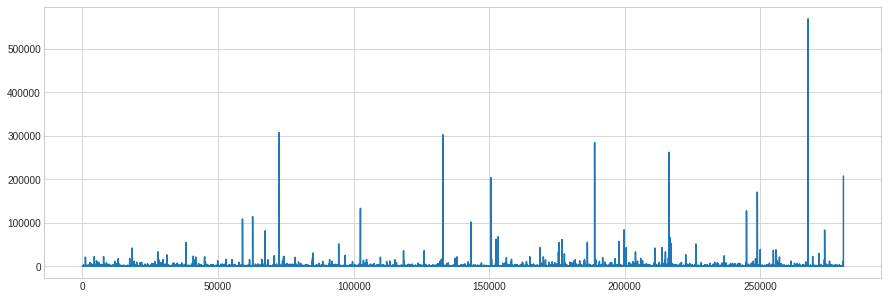

In [17]:
hist = np.zeros(len(vocab_src)+1, dtype=np.int)

for list_of_strings in [xtr, xte]:
    for wlst in list_of_strings:
        for w in wlst:
            if w in vocab_src:
                i = word2indx_src[w]
                hist[i] += 1
            else:
                hist[-1] +=1
plt.figure(figsize = (15,5))
plt.plot(hist)

In [18]:
print(f'* Maximum frequently used word: ', indx2word_src[np.argmax(hist)])
print(f'* Frequent Words:')
for i in range(len(vocab_src)):
    if hist[i] > 50000:
        print(indx2word_src[i], hist[i], end='; ')

* Maximum frequently used word:  the
* Frequent Words:
have 54009; it 107916; this 113726; for 80919; a 306960; you 50697; I 132498; and 301919; /><br 100974; is 203056; was 92658; on 61197; The 67317; his 54198; movie 60762; film 54277; of 283625; are 56513; as 83130; to 261850; but 66282; not 52140; be 50539; that 126818; in 169981; the 568735; with 82569; 

In [0]:
mask = (7 <= hist ) & (hist < 50000)
mask

## Choose words and make a new vocab

In [19]:
mask = (7 <= hist ) & (hist < 50000)
print(f'Chosen words: {mask.sum()}  among  {mask.shape}')
windx = [i for i in range(len(mask)) if mask[i]]

# new vocab and maps
vocab = [indx2word_src[i] for i in windx] + ['<SOS>', '<EOS>', '<UNK>', '<PAD>']
word2indx, indx2word = get_maps(vocab)

print('size of new vocab: ', len(vocab))
#
unk_indx = word2indx['<UNK>']
pad_indx = word2indx['<PAD>']

Chosen words: 58437  among  (280618,)
get_maps:  58441
size of new vocab:  58441


In [20]:
len(vocab), len(set(vocab))

(58441, 58441)

## Convert a sentence (word-list) to list of integer index
- Embedding will be used for NN model

### Examine the lengths of all the sentences

mean: 233.7872, min: 10  max: 2470  std: 173.7, median: 174.0


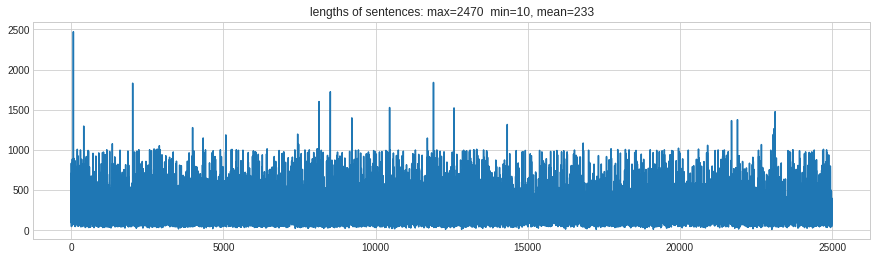

In [21]:
length = np.array([len(wlst) for wlst in xtr])
print(f'mean: {length.mean()}, min: {length.min()}  max: {length.max()}  std: {length.std():.1f}, median: {np.median(length)}')

plt.figure(figsize = (15, 4))
plt.plot(length)
plt.title(f'lengths of sentences: max={max(length)}  min={min(length)}, mean={sum(length)//len(length)}');

## Make Tensor array

In [0]:
max_len = 233  # we will use 233 words

In [0]:
def wseq2numpy(seq, vocab, word2indx, indx2word, max_len=max_len):
    """ seq: input, list of list of words, xtr or xte: [ ['From', 'the', 'world'], ['hello', 'world', 'c', 'c++'], ...]
        out: numpy array of ints [ [ 100, 23, 32], [32, 22, 10], ...]
    """
    print(len(seq), max_len)
    
    out = np.zeros((len(seq), max_len), dtype=np.int64)
    
    for i in range(len(seq)):
        s = seq[i]
        a = out[i]
        if len(s) >= max_len:   # if longer, trim
            s = s[:max_len]
        else:
            s = s + ['<PAD>' for i in range(max_len-len(s))]  # if shorter, pad
            
        for j, w in enumerate(s): # change to index 
            if w in vocab:
                a[j] = word2indx[w]
            else:
                a[j] = word2indx['<UNK>']
                
        if i == 0:
            print(f'{i} {seq[i]}')
    #
    return out

In [24]:
# set searching is much much faster than list searching
xtrain = wseq2numpy(xtr, set(vocab), word2indx, indx2word, max_len=max_len)
xtest  = wseq2numpy(xte, set(vocab), word2indx, indx2word, max_len=max_len)

25000 233
0 ['Chalk', 'this', 'one', 'up', 'in', 'the', 'win', 'column,', 'this', 'was', 'a', 'superb', 'movie.', 'The', 'acting', 'performances', 'were', 'great', 'and', 'the', 'script', 'was', 'equally', 'great.<br', '/><br', '/>Helen', 'Hunt', 'was', 'magnificent', 'as', 'the', 'Riverside', 'police', 'officer', 'Gina', 'Pulasky.', 'Gina', 'was', 'a', 'complex', 'character.', 'She', 'was', 'a', 'rookie', 'cop', 'with', 'the', 'Riverside', 'Police', 'Dept.', 'She', 'ended', 'up', 'in', 'an', 'affair', 'with', 'a', 'coworker', 'that', 'she', 'knew', 'had', 'a', 'wife', 'and', 'kids,', 'all', 'the', 'while', 'she', 'took', 'on', 'the', 'dangerous', 'task', 'of', 'going', 'undercover', 'to', 'catch', 'a', 'serial', 'killer.', '<br', '/><br', '/>Jeff', 'Fahey', '(the', 'Ray', 'Liotta', 'look', 'alike)', 'did', 'a', 'bang', 'up', 'job', 'as', 'the', 'confused,', 'often', 'stammering,', 'police', 'officer', 'that', 'had', 'an', 'affair', 'with', 'Gina.', 'He', 'was', 'stoic', 'as', 'an', 'o

In [25]:
xtrain.shape, xtrain[0]

((25000, 233),
 array([20749, 58439,  3820, 34199, 58439, 58439, 21760, 10487, 58439,
        58439, 58439, 13535, 47085, 58439,  5826, 37076,  8710,  8685,
        58439, 58439, 31179, 58439, 41345, 33806, 58439, 31055, 31399,
        58439, 11825, 58439, 58439, 58439, 40084,  9824,  1151, 58439,
         1151, 58439, 58439, 54401,   109, 15916, 58439, 58439, 40530,
        30348, 58439, 58439, 58439, 54034, 58439, 15916, 24115, 34199,
        58439, 43956,  8524, 58439, 58439, 36217, 58439, 39820, 39973,
        15274, 58439, 51439, 58439, 10180, 24475, 58439,  6071, 39820,
         7890, 58439, 58439,  6731, 33218, 58439, 36137, 19949, 58439,
        29828, 58439, 48975, 31319,  1059, 58439, 34584, 38673, 12111,
        27601, 17553, 27918, 58439, 23205, 58439,  5276, 34199, 28899,
        58439, 58439, 19677,  9548, 58439, 40084,  9824, 58439, 15274,
        43956,  8524, 58439, 58439, 33653, 58439,   141, 58439, 43956,
         4264, 58439, 41662, 58439,  6090, 58439,  6975, 21154

In [26]:
print(xtr[0])
print('---')
print(get_words(indx2word, xtrain[0]))

['Chalk', 'this', 'one', 'up', 'in', 'the', 'win', 'column,', 'this', 'was', 'a', 'superb', 'movie.', 'The', 'acting', 'performances', 'were', 'great', 'and', 'the', 'script', 'was', 'equally', 'great.<br', '/><br', '/>Helen', 'Hunt', 'was', 'magnificent', 'as', 'the', 'Riverside', 'police', 'officer', 'Gina', 'Pulasky.', 'Gina', 'was', 'a', 'complex', 'character.', 'She', 'was', 'a', 'rookie', 'cop', 'with', 'the', 'Riverside', 'Police', 'Dept.', 'She', 'ended', 'up', 'in', 'an', 'affair', 'with', 'a', 'coworker', 'that', 'she', 'knew', 'had', 'a', 'wife', 'and', 'kids,', 'all', 'the', 'while', 'she', 'took', 'on', 'the', 'dangerous', 'task', 'of', 'going', 'undercover', 'to', 'catch', 'a', 'serial', 'killer.', '<br', '/><br', '/>Jeff', 'Fahey', '(the', 'Ray', 'Liotta', 'look', 'alike)', 'did', 'a', 'bang', 'up', 'job', 'as', 'the', 'confused,', 'often', 'stammering,', 'police', 'officer', 'that', 'had', 'an', 'affair', 'with', 'Gina.', 'He', 'was', 'stoic', 'as', 'an', 'officer,', 'b

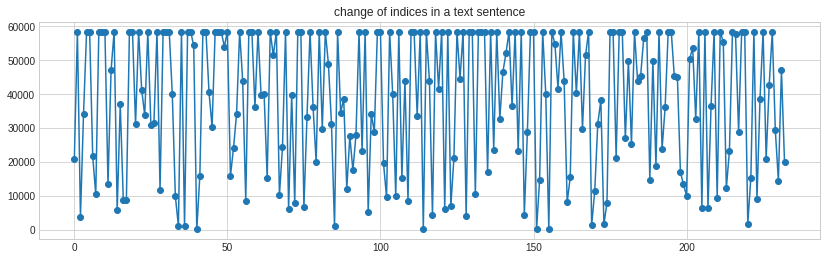

In [27]:
plt.figure(figsize=(14,4))
plt.plot(xtrain[0], '-o')
plt.title('change of indices in a text sentence');

In [28]:
word2indx['<UNK>']

58439

In [29]:
unique, counts = np.unique(xtrain[0], return_counts=True)
print(unique, counts)
print(indx2word[unique[np.argmax(counts)]])

[  101   105   109   141  1059  1151  1378  1617  1780  3820  3986  4264
  4459  5276  5826  6071  6090  6469  6731  6975  7890  8143  8524  8685
  8710  8968  9399  9548  9824 10036 10180 10454 10487 11336 11825 12111
 12339 13380 13535 14469 14740 14799 15274 15326 15501 15916 16959 16977
 17553 18841 19677 19949 19984 20749 20985 21154 21300 21760 23205 23682
 23808 24115 24475 25400 26942 27601 27918 28899 29341 29725 29828 30348
 31055 31179 31319 31399 32771 32785 33218 33653 33806 34199 34584 36110
 36137 36217 36424 36453 37076 38187 38673 38733 39820 39973 40084 40196
 40353 40530 41345 41662 42812 43956 44623 45226 45305 45419 46592 47085
 48975 49908 50494 51439 51497 52039 53611 54034 54401 54797 55350 56552
 57652 58401 58439] [ 1  1  1  1  1  2  1  1  1  1  1  1  1  1  1  1  1  2  1  1  2  1  2  1
  1  1  1  1  2  1  1  1  1  1  1  1  1  1  1  1  1  1  2  1  1  2  1  1
  1  1  1  1  1  1  1  1  1  1  3  1  1  1  1  1  1  1  1  3  1  1  1  1
  1  1  2  1  1  1  1  1  1  3 

## Dataset and Dataloader

In [30]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print (device)

cuda:0


In [0]:
class Dataset(torch.utils.data.Dataset):
    def __init__(self, x, y):
        self.x = x  # np.array(N, max_len)
        self.y = y  # label
        
    def __len__(self):
        return len(self.y)
    
    def __getitem__(self, i):
        return self.x[i], self.y[i]

In [72]:
vocab_len = len(vocab)
embed_dim = int(vocab_len**0.25//1)

print(vocab_len, embed_dim)

58441 15


## NN Model

In [0]:
def make_model(vocab_size = vocab_len, edim = embed_dim, seq_len = max_len, n_target = 2):
    n_features = seq_len*edim
    net = nn.Sequential(
                        nn.Embedding(num_embeddings=vocab_size, embedding_dim=edim, padding_idx=word2indx['<PAD>']),
                        nn.Flatten(), # seq_len * 20 dimensional vector
                        nn.Linear(in_features = n_features, out_features = n_features//2),
                        # nn.BatchNorm1d(n_features//2),
                        nn.Tanh(),
                        nn.Linear(in_features = n_features//2, out_features=n_target)
    )
    
    return net
#

In [84]:
net = make_model()
print(net)

Sequential(
  (0): Embedding(58441, 15, padding_idx=58440)
  (1): Flatten()
  (2): Linear(in_features=3495, out_features=1747, bias=True)
  (3): Tanh()
  (4): Linear(in_features=1747, out_features=2, bias=True)
)


## Training Loop

In [0]:
def training_loop(n_epochs, optim, model, loss_fn, dl_train, dl_val, hist=None, lr_scheduler=None):
    if hist is not None:
        pass
    else:
        hist = {'tloss': [], 'tacc': [], 'vloss': [], 'vacc': []}
    #
    if lr_scheduler is not None:
        lr = []
        
    best_acc = 0
    for epoch in range(1, n_epochs+1):
        tr_loss, tr_acc = 0., 0.
        n_data = 0
        for im_batch, label_batch in dl_train: # minibatch
            im_batch, label_batch = im_batch.to(device), label_batch.to(device)
            ypred = model(im_batch)
            loss_train = loss_fn(ypred, label_batch)
        
            optim.zero_grad()
            loss_train.backward()
            optim.step()
            
            # accumulate correct prediction
            tr_acc  += (torch.argmax(ypred.detach(), dim=1) == label_batch).sum().item() # number of correct predictions
            tr_loss += loss_train.item() * im_batch.shape[0]
            n_data  += im_batch.shape[0]
        # end mini-batch loop
        
        # statistics
        tr_loss /= n_data
        tr_acc  /= n_data
        #
        val_loss, val_acc = performance(model, loss_fn, dl_val)
        
        if epoch <= 5 or epoch % 20 == 0 or epoch == n_epochs:
             print(f'Epoch {epoch}, tloss {tr_loss:.2f} t_acc: {tr_acc:.4f}  vloss {val_loss:.2f}  v_acc: {val_acc:.4f}')
        
        # best accuracy
        if best_acc < val_acc:
            best_acc = val_acc
            print(f' >> best val accuracy updated: {best_acc} at epoch {epoch}.')
        #
        # record for history return
        if hist is not None:
            hist['tloss'].append(tr_loss)
            hist['vloss'].append(val_loss) 
            hist['tacc'].append(tr_acc)
            hist['vacc'].append(val_acc)
            
        if lr_scheduler is not None:
            lr.append(lr_scheduler.get_lr()) # the lr used in optim.
            lr_scheduler.step()
        # end epoch-loop
        
    if lr_scheduler is not None:
        hist['lr'] = lr
        
    print ('finished training_loop().')
    return hist
#

def performance(model, loss_fn, dataloader):
    model.eval()
    with torch.no_grad():
        loss, acc, n = 0., 0., 0.
        for x, y in dataloader:
            x, y = x.to(device), y.to(device)
            ypred = model(x)
            loss += loss_fn(ypred, y).item() * len(y)
            p = torch.argmax(ypred, dim=1)
            acc += (p == y).sum().item()
            n += len(y)
        #
    loss /= n
    acc /= n
    model.train()
    return loss, acc
#
def plot_history(history):
    fig, axes = plt.subplots(1,2, figsize=(16,6))
    axes[0].set_title('Loss'); 
    axes[0].plot(history['tloss'], label='train'); axes[0].plot(history['vloss'], label='val')
    axes[0].legend()
    max_vacc = max(history['vacc'])
    axes[1].set_title(f'Acc. vbest: {max_vacc:.2f}')
    axes[1].plot(history['tacc'], label='train'); axes[1].plot(history['vacc'], label='val')
    axes[1].legend()
#

## Training Setup

In [101]:
batch_size = 128
data_loader = {'train': torch.utils.data.DataLoader(Dataset(xtrain, ytr),  batch_size=batch_size, shuffle=True),
                 'val': torch.utils.data.DataLoader(Dataset(xtest, yte),   batch_size=batch_size)}

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

model = make_model().to(device)

criterion = torch.nn.CrossEntropyLoss().to(device)

learning_rate = 0.1
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=2, gamma=0.9)

history = None

cuda


## First Trial

Epoch 1, tloss 10.76 t_acc: 0.5388  vloss 2.85  v_acc: 0.6000
 >> best val accuracy updated: 0.59996 at epoch 1.


/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:351: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  "please use `get_last_lr()`.", UserWarning)


Epoch 2, tloss 2.16 t_acc: 0.6851  vloss 2.44  v_acc: 0.7324
 >> best val accuracy updated: 0.7324 at epoch 2.
Epoch 3, tloss 1.75 t_acc: 0.7568  vloss 1.85  v_acc: 0.7248
Epoch 4, tloss 2.38 t_acc: 0.7721  vloss 3.80  v_acc: 0.7301
Epoch 5, tloss 1.85 t_acc: 0.8035  vloss 3.70  v_acc: 0.6863
 >> best val accuracy updated: 0.74644 at epoch 7.
 >> best val accuracy updated: 0.75288 at epoch 8.
 >> best val accuracy updated: 0.758 at epoch 10.
 >> best val accuracy updated: 0.76632 at epoch 11.
 >> best val accuracy updated: 0.77464 at epoch 13.
 >> best val accuracy updated: 0.77808 at epoch 14.
 >> best val accuracy updated: 0.78008 at epoch 17.
 >> best val accuracy updated: 0.787 at epoch 19.
Epoch 20, tloss 1.17 t_acc: 0.9076  vloss 4.58  v_acc: 0.7837
 >> best val accuracy updated: 0.78852 at epoch 21.
 >> best val accuracy updated: 0.7886 at epoch 29.
 >> best val accuracy updated: 0.79068 at epoch 31.
 >> best val accuracy updated: 0.79092 at epoch 36.
 >> best val accuracy updat

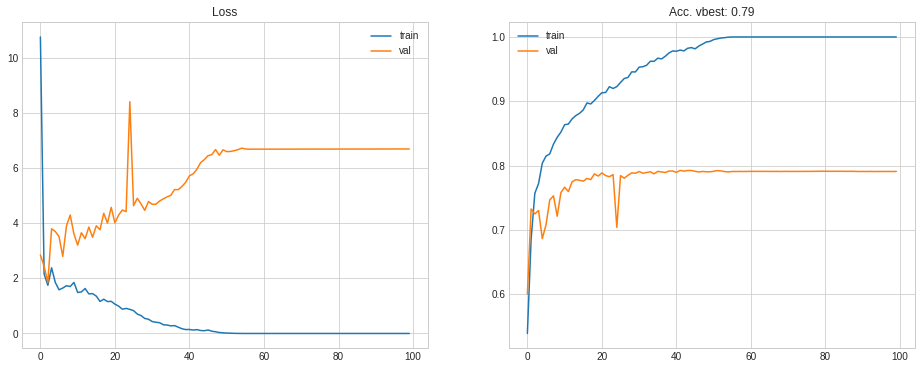

In [102]:
%%time
history = training_loop(100, optimizer, model, criterion,
                        data_loader['train'], data_loader['val'], 
                        history, 
                        lr_scheduler=lr_scheduler)
plot_history(history)

In [0]:
#79% was the best accuracy